In [86]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler


In [87]:
sales_train = pd.read_csv('BigW_data/Sales by customer location train.csv')
sales_test = pd.read_csv('BigW_data/Sales by customer location test.csv')
combined_df = pd.concat([sales_train, sales_test], ignore_index=True)

store = pd.read_csv('BigW_data/Sales by store location.csv')
media = pd.read_csv('BigW_data/Media Investment.csv')
# aus = gpd.read_file('SA4_2021_AUST_SHP_GDA2020/SA4_2021_AUST_GDA2020.shp')

### Data Cleaning 

In [88]:
sales_train.isnull().sum()

store_id                             0
sales_channel                        0
customer_state                       0
customer_postcode                    7
price_lifestage_segment          13565
customer_count                       0
transaction_count                    0
total_sale_value                     0
total_sale_value_ex_gst              0
total_promotional_sales_value        0
financial_week_end_date              0
dtype: int64

In [89]:
sales_test.isnull().sum()

store_id                            0
sales_channel                       0
customer_state                      0
customer_postcode                   1
price_lifestage_segment          2645
customer_count                      0
transaction_count                   0
total_sale_value                    0
total_sale_value_ex_gst             0
total_promotional_sales_value       0
financial_week_end_date             0
dtype: int64

In [90]:
sales_train1 = sales_train.dropna()
sales_train1 = sales_train1.reset_index(drop=True)

sales_test1 = sales_test.dropna()
sales_test1 = sales_test1.reset_index(drop=True)

combined_df1 = combined_df.dropna()
combined_df1 = combined_df.reset_index(drop=True)

In [91]:
# turn negative values in promotion sales to 0 
sales_train1.loc[sales_train1['total_promotional_sales_value'] < 0, 'total_promotional_sales_value']=0
sales_test1.loc[sales_test1['total_promotional_sales_value'] < 0, 'total_promotional_sales_value']=0
combined_df.loc[combined_df['total_promotional_sales_value'] < 0, 'total_promotional_sales_value']=0

In [92]:
sales_train1.isnull().sum()

store_id                         0
sales_channel                    0
customer_state                   0
customer_postcode                0
price_lifestage_segment          0
customer_count                   0
transaction_count                0
total_sale_value                 0
total_sale_value_ex_gst          0
total_promotional_sales_value    0
financial_week_end_date          0
dtype: int64

In [93]:
store1 = store.copy()
store1['co_location_flag'] = store1['co_location_flag'].fillna(True)
store1.iloc[0,7] = '>5 KM'
store1.iloc[0,8] = '>5 KM'

In [94]:
store1.isnull().sum()

store_id                         0
store_state                      0
store_postcode                   0
store_latitude                   0
store_longitude                  0
co_location_flag                 0
sales_channel                    0
distance_to_kmart                0
distance_to_target               0
total_sale_value                 0
total_sale_value_ex_gst          0
total_promotional_sales_value    0
dtype: int64

In [95]:
media.head()

,week_ending,state,media_amount_spend
0,11/07/2021,NT,5960.266526
1,9/10/2022,NT,11727.146180
2,22/01/2023,NT,13918.705420
3,2/01/2022,NT,13076.182500
4,5/06/2022,NT,20148.750420


In [96]:
media['state'].unique()

array(['NT', 'SA', 'WA', 'ACT', 'NSW', 'QLD', 'TAS', 'VIC', 'UNKNOWN',
       'National'], dtype=object)

In [97]:
media[(media['state']=='UNKNOWN')| (media['state']=='National')]

,week_ending,state,media_amount_spend
824,20/03/2022,UNKNOWN,9.400030e-01
825,18/07/2021,UNKNOWN,2.900000e-01
826,6/11/2022,UNKNOWN,1.637001e+01
827,12/02/2023,UNKNOWN,3.100855e+01
828,26/02/2023,UNKNOWN,3.354000e+01
...,...,...,...
943,1/01/2023,National,9.323000e+06
944,4/07/2021,National,4.810000e+06
945,3/10/2021,National,9.185000e+06
946,5/12/2021,National,6.429000e+06


In [98]:
media1 = media[(media['state']!='UNKNOWN')& (media['state']!='National')]

In [99]:
media1[(media1['state']=='UNKNOWN')& (media1['state']=='National')]

,week_ending,state,media_amount_spend


In [100]:
media1[media1['media_amount_spend']<0]

,week_ending,state,media_amount_spend


In [101]:
media1['week_ending'] = pd.to_datetime(media1['week_ending'])
# media1['week_ending'] = media1['week_ending'].dt.strftime('%Y-%m-%d')

/var/folders/sm/pvsh_08j0q9fp5m216cy4qhw0000gn/T/ipykernel_2143/4248562551.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  media1['week_ending'] = pd.to_datetime(media1['week_ending'])
/var/folders/sm/pvsh_08j0q9fp5m216cy4qhw0000gn/T/ipykernel_2143/4248562551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media1['week_ending'] = pd.to_datetime(media1['week_ending'])


In [102]:
media1['week_ending'].min()

Timestamp('2021-01-08 00:00:00')

In [103]:
media1['week_ending'].max()

Timestamp('2023-12-02 00:00:00')

In [104]:

media1['year_month'] = media1['week_ending'].dt.strftime('%Y-%m')

/var/folders/sm/pvsh_08j0q9fp5m216cy4qhw0000gn/T/ipykernel_2143/2003241533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media1['year_month'] = media1['week_ending'].dt.strftime('%Y-%m')


### (Media) Group by year_month 

In [105]:
media1 = media1.sort_values(by='week_ending').reset_index(drop=True)
media1['week_ending'].unique()
# media_monthly['year_month'] = media_monthly['year_month'].dt.strftime('%Y-%m')

array(['2021-01-08T00:00:00.000000000', '2021-02-05T00:00:00.000000000',
       '2021-03-10T00:00:00.000000000', '2021-03-21T00:00:00.000000000',
       '2021-03-28T00:00:00.000000000', '2021-04-04T00:00:00.000000000',
       '2021-04-07T00:00:00.000000000', '2021-04-18T00:00:00.000000000',
       '2021-04-25T00:00:00.000000000', '2021-05-09T00:00:00.000000000',
       '2021-05-12T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-23T00:00:00.000000000', '2021-05-30T00:00:00.000000000',
       '2021-06-06T00:00:00.000000000', '2021-06-13T00:00:00.000000000',
       '2021-06-20T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-18T00:00:00.000000000',
       '2021-07-25T00:00:00.000000000', '2021-08-08T00:00:00.000000000',
       '2021-08-15T00:00:00.000000000', '2021-08-22T00:00:00.000000000',
       '2021-08-29T00:00:00.000000000', '2021-09-05T00:00:00.000000000',
       '2021-09-19T00:00:00.000000000', '2021-09-26

In [106]:
# groupby data instead of state beecause all states has same media amount spend trend throughout each year, 
# although their spend amount is different

media_monthly = pd.DataFrame(media1.groupby(['year_month','state'])['media_amount_spend'].sum().round(2)).reset_index()


media_monthly

,year_month,state,media_amount_spend
0,2021-01,ACT,5453.21
1,2021-01,NSW,2950173.44
2,2021-01,NT,6038.13
3,2021-01,QLD,1516658.56
4,2021-01,SA,397344.54
...,...,...,...
227,2023-12,QLD,219962.82
228,2023-12,SA,74718.79
229,2023-12,TAS,13638.74
230,2023-12,VIC,257337.27


In [107]:
# mean media spend amount 2021-03 and 2022-03
filtered_df = media_monthly[media_monthly['year_month'].isin(['2021-03', '2022-03'])]
march_2023 = filtered_df.groupby(['state'])['media_amount_spend'].mean()
print(march_2023)

# mean media spend amount 2021-04 and 2022-04
filtered_df1 = media_monthly[media_monthly['year_month'].isin(['2021-04', '2022-04'])]
april_2023 = filtered_df1.groupby(['state'])['media_amount_spend'].mean()
print(april_2023)




state
ACT      31867.980
NSW    6180823.875
NT       49288.670
QLD    2876333.925
SA      754912.965
TAS      73217.425
VIC    4200653.960
WA     1318948.455
Name: media_amount_spend, dtype: float64
state
ACT      29061.305
NSW    7483414.290
NT       46737.520
QLD    3584293.675
SA      889427.310
TAS      91642.150
VIC    5631157.240
WA     1502191.465
Name: media_amount_spend, dtype: float64


In [108]:
# missing values from 2023-03 and 04 media spend have been filled with mean values from 2021/2022-03 and 04
# each state has it's own media spend amount each month of year 

m_2023 = {'year_month':'2023-03',
          'state':['ACT','NSW','NT','QLD','SA','TAS','VIC','WA'],
          'media_amount_spend':[31867.980, 6180823.875, 49288.670, 2876333.925, 754912.965, 73217.425, 4200653.960,1318948.455]}

a_2023 = {'year_month':'2023-04',
          'state':['ACT','NSW','NT','QLD','SA','TAS','VIC','WA'],
          'media_amount_spend':[29061.305, 7483414.290, 46737.520, 3584293.675, 889427.310, 91642.150, 5631157.240,1502191.465]}



m_2023 = pd.DataFrame(m_2023)
a_2023 = pd.DataFrame(a_2023)

# append missing values to dataframe
media_monthly = pd.concat([media_monthly, m_2023, a_2023], ignore_index=True)


In [109]:
media_monthly

,year_month,state,media_amount_spend
0,2021-01,ACT,5453.210
1,2021-01,NSW,2950173.440
2,2021-01,NT,6038.130
3,2021-01,QLD,1516658.560
4,2021-01,SA,397344.540
...,...,...,...
243,2023-04,QLD,3584293.675
244,2023-04,SA,889427.310
245,2023-04,TAS,91642.150
246,2023-04,VIC,5631157.240


In [110]:
media_monthly['year_month'] = pd.to_datetime(media_monthly['year_month'], format='%Y-%m')
media_monthly['year_month'] = media_monthly['year_month'].dt.strftime('%Y-%m')

media_monthly

,year_month,state,media_amount_spend
0,2021-01,ACT,5453.210
1,2021-01,NSW,2950173.440
2,2021-01,NT,6038.130
3,2021-01,QLD,1516658.560
4,2021-01,SA,397344.540
...,...,...,...
243,2023-04,QLD,3584293.675
244,2023-04,SA,889427.310
245,2023-04,TAS,91642.150
246,2023-04,VIC,5631157.240


In [111]:
media_monthly = media_monthly.sort_values(by='year_month').reset_index(drop=True)

# drop 2023-08, 2023-12
# media_monthly = media_monthly.drop([29, 30]).reset_index(drop=True)
media_monthly

,year_month,state,media_amount_spend
0,2021-01,ACT,5453.21
1,2021-01,NSW,2950173.44
2,2021-01,NT,6038.13
3,2021-01,QLD,1516658.56
4,2021-01,SA,397344.54
...,...,...,...
243,2023-12,SA,74718.79
244,2023-12,QLD,219962.82
245,2023-12,NT,13379.36
246,2023-12,NSW,433767.00


In [112]:
media_monthly.rename(columns={'state': 'customer_state'}, inplace=True)
media_monthly

,year_month,customer_state,media_amount_spend
0,2021-01,ACT,5453.21
1,2021-01,NSW,2950173.44
2,2021-01,NT,6038.13
3,2021-01,QLD,1516658.56
4,2021-01,SA,397344.54
...,...,...,...
243,2023-12,SA,74718.79
244,2023-12,QLD,219962.82
245,2023-12,NT,13379.36
246,2023-12,NSW,433767.00


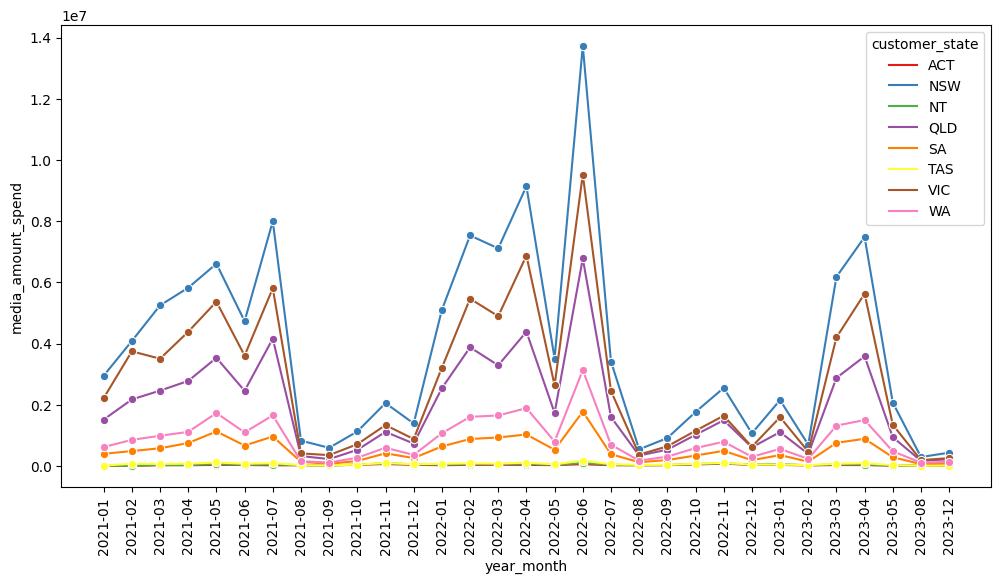

In [113]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(data=media_monthly, x='year_month', y='media_amount_spend', hue='customer_state', marker='o', palette='Set1')
plt.xticks(rotation = 90)

# plt.xticks(ticks=media_monthly['year_month'][::n], labels=media_monthly['year_month'][::n].dt.strftime('%Y-%m'), rotation=90)

plt.show()

### Combine Customer Location & Store

In [114]:
sales_train1['price_lifestage_segment'] = sales_train1['price_lifestage_segment'].astype(str)
combined_df1['price_lifestage_segment'] = combined_df1['price_lifestage_segment'].astype(str)

In [115]:
sales_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814020 entries, 0 to 1814019
Data columns (total 11 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   store_id                       object 
 1   sales_channel                  object 
 2   customer_state                 object 
 3   customer_postcode              float64
 4   price_lifestage_segment        object 
 5   customer_count                 int64  
 6   transaction_count              int64  
 7   total_sale_value               float64
 8   total_sale_value_ex_gst        float64
 9   total_promotional_sales_value  float64
 10  financial_week_end_date        object 
dtypes: float64(4), int64(2), object(5)
memory usage: 152.2+ MB


In [116]:
store_ids_set1 = set(sales_train1['store_id'])
store_ids_set2 = set(store1['store_id'])

# Find unmatched store IDs
unmatched_ids_df1 = store_ids_set1 - store_ids_set2
unmatched_ids_df2 = store_ids_set2 - store_ids_set1

# Display unmatched store IDs
print("Unmatched Store IDs in DataFrame 1:", unmatched_ids_df1)
print("Unmatched Store IDs in DataFrame 2:", unmatched_ids_df2)


Unmatched Store IDs in DataFrame 1: set()
Unmatched Store IDs in DataFrame 2: {'f639b3bffb0910cb1de42fee016df58d'}


In [117]:
# sales train drop nan 后比store dataset 少一个store id, 所以把这个store id 从store中删除了

store1 = store1[store1['store_id'] != 'f639b3bffb0910cb1de42fee016df58d']

In [118]:
# Store dataset group by store id

unique_store = store1.groupby(['store_id']).agg({
    'store_state':'first','store_postcode':'first', 'store_latitude':'first' ,'store_longitude':'first', 
       'co_location_flag':'first', 'distance_to_kmart':'first', 'distance_to_target':'first',
    'total_sale_value': 'sum','total_promotional_sales_value':'sum','total_sale_value_ex_gst':'sum'
}).reset_index()

unique_store


,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,distance_to_kmart,distance_to_target,total_sale_value,total_promotional_sales_value,total_sale_value_ex_gst
0,00f80c0962fb37ea8fb72accc75546c8,TAS,7050,-42.9759,147.3085,True,>5 KM,>5 KM,63516938.31,7741346.78,57946972.60
1,00fdea78e677259a3e44868468f24bbf,QLD,4053,-27.4093,152.9800,True,1-3 KM,Same Centre,52957737.59,7563628.70,48297404.90
2,03d9b714d7ac602a9755a662c1d65be4,QLD,4187,-19.3174,146.7285,True,3-5 KM,>5 KM,76112737.87,7932218.02,69489762.91
3,059fffb74fa5f6ebe37bd1df479c02f7,QLD,4720,-23.5169,148.2108,True,>5 KM,>5 KM,55341416.14,6735050.98,50473985.98
4,05c3e372f03989d8e904372a2767f158,SA,5158,-35.0787,138.5169,True,>5 KM,3-5 KM,30462616.26,5037218.08,27829177.50
...,...,...,...,...,...,...,...,...,...,...,...
172,fbfaede8d00839631393db8bdecbb3db,SA,5046,-35.0138,138.5447,True,Same Centre,Same Centre,73475153.85,9017465.16,67049965.38
173,fc25b8de93fc78247ad51123fd96c07d,SA,5125,-34.7753,138.7160,True,3-5 KM,3-5 KM,42522051.91,6505523.65,38834898.46
174,fc2751520dda99c0c7f267904fb483e7,NSW,2594,-34.3036,148.2702,False,>5 KM,>5 KM,42959298.99,5465555.31,39231426.97
175,fec8038ae4436caa7188b2e3f0bd216f,WA,6155,-32.0388,115.8889,True,3-5 KM,3-5 KM,51649026.67,6971991.23,47150907.22


In [119]:
# merge training set and unique store dataset 

sales_train1 = sales_train1.merge(unique_store, on='store_id', how='left')
sales_train1

sales_test1 = sales_test1.merge(unique_store, on='store_id', how='left')
sales_test1

combined_df1 = combined_df1.merge(unique_store, on='store_id', how='left')

### Combine Slaes_train1 & media_monthly

In [120]:
sales_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814020 entries, 0 to 1814019
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   store_id                         object 
 1   sales_channel                    object 
 2   customer_state                   object 
 3   customer_postcode                float64
 4   price_lifestage_segment          object 
 5   customer_count                   int64  
 6   transaction_count                int64  
 7   total_sale_value_x               float64
 8   total_sale_value_ex_gst_x        float64
 9   total_promotional_sales_value_x  float64
 10  financial_week_end_date          object 
 11  store_state                      object 
 12  store_postcode                   int64  
 13  store_latitude                   float64
 14  store_longitude                  float64
 15  co_location_flag                 bool   
 16  distance_to_kmart                object 
 17  distance

In [121]:
sales_train1['financial_week_end_date'] =pd.to_datetime(sales_train1['financial_week_end_date'])
sales_test1['financial_week_end_date'] =pd.to_datetime(sales_test1['financial_week_end_date'])
combined_df1['financial_week_end_date'] =pd.to_datetime(combined_df1['financial_week_end_date'])

In [122]:
sales_train1['year_month'] = sales_train1['financial_week_end_date'].dt.strftime('%Y-%m')
sales_test1['year_month'] = sales_test1['financial_week_end_date'].dt.strftime('%Y-%m')
combined_df1['year_month'] = combined_df1['financial_week_end_date'].dt.strftime('%Y-%m')

In [123]:
# The combination of the two dataframes appends media investment for each month in each state to the sales train

sales_train1 = sales_train1.copy().merge(media_monthly, on=['year_month','customer_state'], how='left')

sales_test1 = sales_test1.copy().merge(media_monthly, on=['year_month','customer_state'], how='left')

combined_df1 = combined_df1.copy().merge(media_monthly, on=['year_month','customer_state'], how='left')

In [124]:
sales_train1

,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value_x,total_sale_value_ex_gst_x,total_promotional_sales_value_x,...,store_latitude,store_longitude,co_location_flag,distance_to_kmart,distance_to_target,total_sale_value_y,total_promotional_sales_value_y,total_sale_value_ex_gst_y,year_month,media_amount_spend
0,536fcc1021bff60edb212ca9b2480757,Store,NSW,2550.0,Budget-New Families,51,77,6691.29,6146.98,1545.78,...,-36.6785,149.8398,True,>5 KM,>5 KM,38132622.27,5879501.90,34759019.81,2023-03,6180823.875
1,151e50feaf21b61cf23e0b944abebe28,Store,VIC,3222.0,Budget-Retirees,8,8,364.53,331.40,89.72,...,-38.1467,144.3587,True,1-3 KM,Same Centre,57694483.90,7166089.98,52597105.02,2022-01,3209616.050
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,Store,QLD,4101.0,Mainstream-Young Singles/Couples,10,11,446.25,405.69,9.75,...,-27.5600,153.0811,True,Same Centre,Same Centre,92482637.90,9571752.04,84342899.73,2023-03,2876333.925
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,Store,SA,5253.0,Mainstream-Young Families,79,119,7479.89,6817.90,1365.50,...,-35.1183,139.2747,True,>5 KM,>5 KM,42636413.34,6131102.71,38922466.04,2023-01,356125.960
4,97012ce84c33e28732cb5f12bb92363c,Store,VIC,3064.0,Premium-New Families,58,84,6172.44,5630.27,508.59,...,-37.5939,144.9103,True,Same Centre,>5 KM,54545504.41,7088165.04,49733005.77,2021-11,1335517.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814015,17b4adf18100c8673e3f2c72dff87722,Store,QLD,4220.0,Mainstream-Midage Singles/Couples,8,9,710.79,646.18,319.40,...,-28.0805,153.3836,True,Same Centre,Same Centre,90359604.31,9031217.55,82398417.91,2021-07,4161605.600
1814016,b16365302aa017bfadf5b34a84a84e45,Store,WA,6066.0,Mainstream-Retirees,42,46,2064.05,1886.07,268.02,...,-31.8720,115.8592,True,Same Centre,3-5 KM,60844174.39,7251128.76,55488379.89,2022-12,299486.440
1814017,d0f1c52a0107bd8707444bbf130a0234,Store,WA,6170.0,Mainstream-Midage Singles/Couples,29,37,1795.17,1634.68,170.20,...,-32.2476,115.8123,True,>5 KM,>5 KM,59498612.01,6925746.81,54288917.48,2022-02,1605819.910
1814018,408b7c8ad06e4d9954fa2d948a01f508,Store,NSW,2769.0,Mainstream-Older Singles/Couples,32,38,2141.80,1973.61,204.08,...,-33.6917,150.9247,True,Same Centre,>5 KM,92531636.15,10145143.98,84402708.86,2022-12,1066955.210


In [125]:

aa = pd.DataFrame(combined_df1.groupby(['year_month','customer_state'])['total_sale_value_x'].sum().round(1).reset_index())
bb = pd.DataFrame(combined_df1.groupby(['year_month'])['total_sale_value_x'].sum().round(1).reset_index())


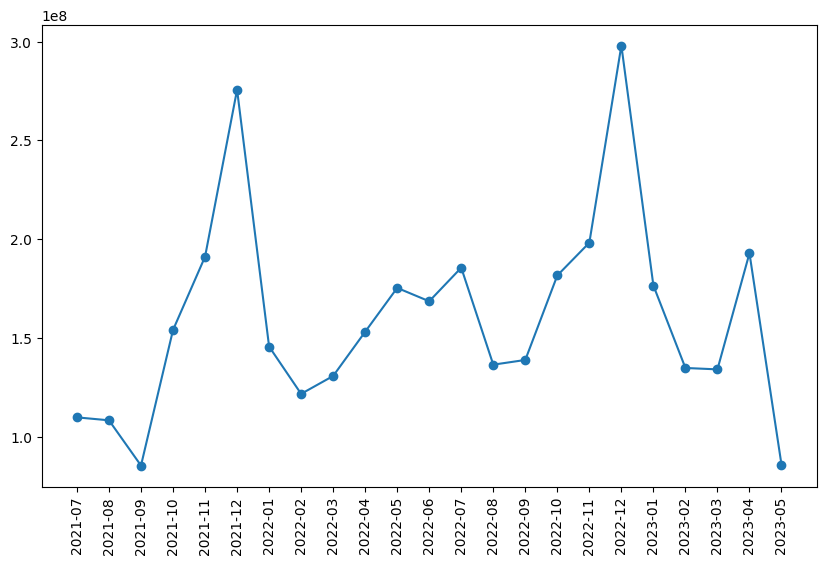

In [126]:

# media investment seems unable to boom sales, total sales value increase since September to December each year 
plt.figure(figsize=(10, 6))
plt.plot(bb['year_month'], bb['total_sale_value_x'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.show()

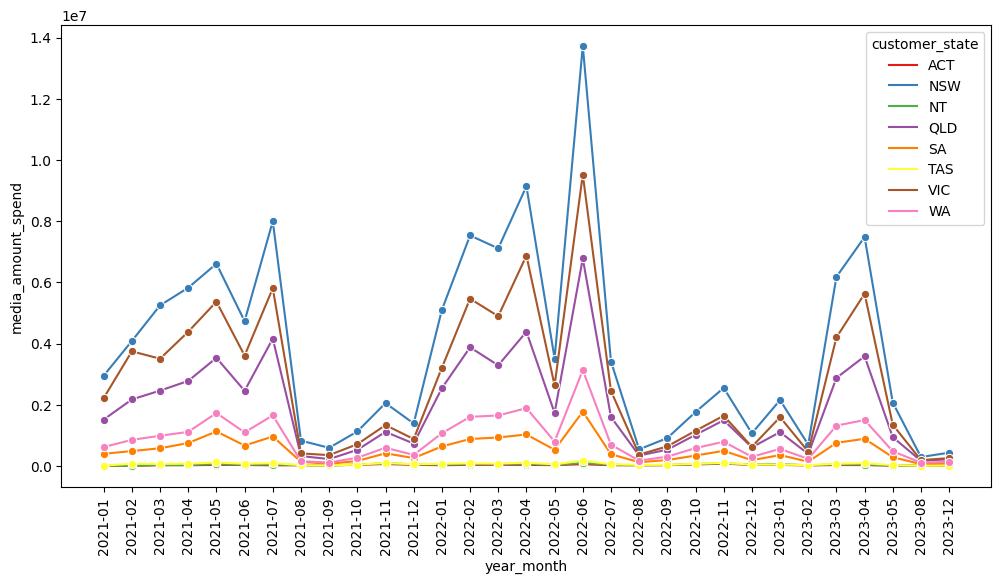

In [127]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(data=media_monthly, x='year_month', y='media_amount_spend', hue='customer_state', marker='o', palette='Set1')
plt.xticks(rotation = 90)

plt.show()





In [128]:
country_media_monthly = pd.DataFrame(media_monthly.groupby(['year_month'])['media_amount_spend'].sum().round(2)).reset_index()

# months_to_exclude = ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2023-08', '2023-12']
# country_media_monthly = country_media_monthly[~country_media_monthly['year_month'].isin(months_to_exclude)]

country_media_monthly

,year_month,media_amount_spend
0,2021-01,7727951.64
1,2021-02,11435681.60
2,2021-03,12910751.88
3,2021-04,14985961.65
4,2021-05,18588916.50
5,2021-06,12706990.06
6,2021-07,20747695.85
7,2021-08,1928998.97
8,2021-09,1413426.71
9,2021-10,2926143.84


In [129]:
country_media_monthly['month'] = pd.to_datetime(country_media_monthly['year_month']).dt.strftime('%m')

# Group the data by 'month' and calculate the mean 'media_amount_spend'
result = country_media_monthly.groupby('month')['media_amount_spend'].mean().reset_index()

# Sort the result by 'month' if needed
result = pd.DataFrame(result.sort_values(by='month').round(2))

# Display the result
(result['media_amount_spend']/ 23994959.83).round(2)





0     0.37
1     0.46
2     0.65
3     0.80
4     0.46
5     1.00
6     0.61
7     0.06
8     0.09
9     0.17
10    0.27
11    0.11
Name: media_amount_spend, dtype: float64

In [130]:
total_sales_monthly = pd.DataFrame(sales_train1.groupby(['year_month'])['total_sale_value_x'].sum().round(2)).reset_index()
total_sales_monthly

,year_month,total_sale_value_x
0,2021-07,8.983052e+07
1,2021-08,8.916955e+07
2,2021-09,7.114335e+07
3,2021-10,1.277387e+08
4,2021-11,1.579087e+08
5,2021-12,2.283428e+08
6,2022-01,1.205917e+08
7,2022-02,1.002265e+08
8,2022-03,1.082580e+08
9,2022-04,1.264944e+08


In [131]:
total_sales_monthly['month'] = pd.to_datetime(total_sales_monthly['year_month']).dt.strftime('%m')

# Group the data by 'month' and calculate the mean 'media_amount_spend'
result = total_sales_monthly.groupby('month')['total_sale_value_x'].mean().reset_index()

# Sort the result by 'month' if needed
result = pd.DataFrame(result.sort_values(by='month').round(1))

# Display the result
(result['total_sale_value_x']/ 238393041.4).round(2)



0     0.56
1     0.44
2     0.46
3     0.60
4     0.46
5     0.59
6     0.51
7     0.42
8     0.39
9     0.58
10    0.68
11    1.00
Name: total_sale_value_x, dtype: float64

### Feature Engineering 

In [132]:
month_to_value = {
    1: 0.56,   # January
    2: 0.44, # February
    3: 0.46,   # March
    4: 0.60, # April
    5: 0.46, # May
    6: 0.59, # June
    7: 0.51, # July
    8: 0.42, # August
    9: 0.39, # September
    10: 0.58, # October
    11: 0.68, # November
    12: 1.00  # December
}


sales_train1['year_month'] = pd.to_datetime(sales_train1['year_month'])
sales_test1['year_month'] = pd.to_datetime(sales_test1['year_month'])

# Create a new column based on the mapping
sales_train1['year_month_sales'] = sales_train1['year_month'].dt.month.map(month_to_value)

sales_test1['year_month_sales'] = sales_test1['year_month'].dt.month.map(month_to_value)


combined_df1['year_month'] = pd.to_datetime(combined_df1['year_month'])
combined_df1['year_month_sales'] = combined_df1['year_month'].dt.month.map(month_to_value)


<span style='color:green'> **Convert different month for mutiple years to numerical based on the trend of total sales value accross years, which can be used directly and effectively as a viarble in OLS. However, I've tried to assign numerical values to month based on media amount spend on each month, the result turns out to be unexplainable due to extreme low correlation with sales and low t-value in the OLS** </span>

In [133]:
sales_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814020 entries, 0 to 1814019
Data columns (total 24 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   store_id                         object        
 1   sales_channel                    object        
 2   customer_state                   object        
 3   customer_postcode                float64       
 4   price_lifestage_segment          object        
 5   customer_count                   int64         
 6   transaction_count                int64         
 7   total_sale_value_x               float64       
 8   total_sale_value_ex_gst_x        float64       
 9   total_promotional_sales_value_x  float64       
 10  financial_week_end_date          datetime64[ns]
 11  store_state                      object        
 12  store_postcode                   int64         
 13  store_latitude                   float64       
 14  store_longitude                  f

In [134]:
def extract_segment1(value):
    if value:
        if "new families" in value.lower():
            return "New Families"
        elif "retirees" in value.lower():
            return "Retirees"
        elif "older singles/couples" in value.lower():
            return "Older Singles/Couples"
        elif "young singles/couples" in value.lower():
            return "Young Singles/Couples"
        elif "young families" in value.lower():
            return "Young Families"
        elif "older families" in value.lower():
            return "Older Families"
        elif "midage singles/couples" in value.lower():
            return "Midage Singles/Couples"
    return None

sales_train1['segment'] = sales_train1['price_lifestage_segment'].apply(extract_segment1)
sales_test1['segment'] = sales_test1['price_lifestage_segment'].apply(extract_segment1)
combined_df1['segment'] = combined_df1['price_lifestage_segment'].apply(extract_segment1)

In [135]:
def extract_segment(value):
    if value:
        if "budget" in value.lower():
            return "Budget"
        elif "premium" in value.lower():
            return "Premium"
        elif "mainstream" in value.lower():
            return "Mainstream"
    return None

sales_train1['main_segment'] = sales_train1['price_lifestage_segment'].apply(extract_segment)
sales_test1['main_segment'] = sales_test1['price_lifestage_segment'].apply(extract_segment)
combined_df1['main_segment'] = combined_df1['price_lifestage_segment'].apply(extract_segment)


In [136]:
# Distance to Target and Kmart 

def set_distance_kmart(distance):
    if distance == '1-3 KM':
        return 0.87
    elif distance == '3-5 KM':
        return 0.79
    elif distance == '<1 KM':
        return 0.95
    elif distance == '>5 KM':
        return 1
    elif distance == 'Same Centre':
        return 0.66
    else:
        return None  # Set to None for values that don't match the conditions
    
def set_distance_target(distance):
    if distance == '1-3 KM':
        return 0.96
    elif distance == '3-5 KM':
        return 0.77
    elif distance == '<1 KM':
        return 1
    elif distance == '>5 KM':
        return 0.94
    elif distance == 'Same Centre':
        return 0.73
    else:
        return None

# Apply the custom function to the 'distance_km' column
sales_train1['distance_kmart'] = sales_train1['distance_to_kmart'].apply(set_distance_kmart)
sales_train1['distance_target'] = sales_train1['distance_to_target'].apply(set_distance_target)

sales_test1['distance_kmart'] = sales_test1['distance_to_kmart'].apply(set_distance_kmart)
sales_test1['distance_target'] = sales_test1['distance_to_target'].apply(set_distance_target)

sales_train1['distance_kmart_target']=sales_train1['distance_kmart']*sales_train1['distance_target']
sales_test1['distance_kmart_target']=sales_test1['distance_kmart']*sales_test1['distance_target']



combined_df1['distance_kmart'] = combined_df1['distance_to_kmart'].apply(set_distance_kmart)
combined_df1['distance_target'] = combined_df1['distance_to_target'].apply(set_distance_target)
combined_df1['distance_kmart_target']=combined_df1['distance_kmart']*sales_test1['distance_target']

In [137]:
# co_location_flag

def set_values1(co):
    if co == True:
        return 0.68
    elif co == False:
        return 1
    else:
        return None  # Set to None for values that don't match the conditions
sales_train1['co'] = sales_train1['co_location_flag'].apply(set_values1)
# sales_train1['co'] = sales_train1['co_location_flag'].apply(set_values1)
sales_test1['co'] = sales_test1['co_location_flag'].apply(set_values1)
combined_df1['co'] = combined_df1['co_location_flag'].apply(set_values1)

In [138]:
# price_lifestage_segment

def set_lifestage_segments(segment):
    if segment == 'Budget-Midage Singles/Couples':
        return 0.44
    elif segment == 'Budget-New Families':
        return 0.75
    elif segment == 'Budget-Older Families':
        return 0.62
    elif segment == 'Budget-Older Singles/Couples':
        return 0.62
    elif segment == 'Budget-Retirees':
        return 0.43
    elif segment == 'Budget-Young Families':
        return 1
    elif segment == 'Budget-Young Singles/Couples':
        return 0.52
    
    elif segment == 'Mainstream-Midage Singles/Couples':
        return 0.37
    elif segment == 'Mainstream-New Families':
        return 0.51
    elif segment == 'Mainstream-Older Families':
        return 0.48
    elif segment == 'Mainstream-Older Singles/Couples':
        return 0.63
    elif segment == 'Mainstream-Retirees':
        return 0.53
    elif segment == 'Mainstream-Young Families':
        return 0.73
    elif segment == 'Mainstream-Young Singles/Couples':
        return 0.41
    
    elif segment == 'Premium-Midage Singles/Couples':
        return 0.27
    elif segment == 'Premium-New Families':
        return 0.34
    elif segment == 'Premium-Older Families':
        return 0.3
    elif segment == 'Premium-Older Singles/Couples':
        return 0.43
    elif segment == 'Premium-Retirees':
        return 0.38
    elif segment == 'Premium-Young Families':
        return 0.51
    elif segment == 'Premium-Young Singles/Couples':
        return 0.25
 
    else:
        return None  

    
sales_train1['price_lifestage_segment_num'] = sales_train1['price_lifestage_segment'].apply(set_lifestage_segments)

sales_test1['price_lifestage_segment_num'] = sales_test1['price_lifestage_segment'].apply(set_lifestage_segments)
combined_df1['price_lifestage_segment_num'] = combined_df1['price_lifestage_segment'].apply(set_lifestage_segments)

In [139]:
# main_segment

def set_main_segments(segment):
    if segment == 'Budget':
        return 1
    elif segment == 'Premium':
        return 0.56
    elif segment == 'Mainstream':
        return 0.81
    else:
        return None

sales_train1['main_segment_num'] = sales_train1['main_segment'].apply(set_main_segments)
sales_test1['main_segment_num'] = sales_test1['main_segment'].apply(set_main_segments)
combined_df1['main_segment_num'] = combined_df1['main_segment'].apply(set_main_segments)



In [140]:
# segment

def set_segments(segment):
    if segment == 'Midage Singles/Couples':
        return 0.45
    elif segment == 'New Families':
        return 0.72
    elif segment == 'Older Families':
        return 0.64
    elif segment == 'Older Singles/Couples':
        return 0.72
    elif segment == 'Retirees':
        return 0.57
    elif segment == 'Young Families':
        return 1
    elif segment == 'Young Singles/Couples':
        return 0.52
 
    else:
        return None  

    
sales_train1['segment_num'] = sales_train1['segment'].apply(set_segments)
sales_test1['segment_num'] = sales_test1['segment'].apply(set_segments)
combined_df1['segment_num'] = combined_df1['segment'].apply(set_segments)

In [141]:
# state

def set_states(state):
    if state == 'ACT':
        return 0.58
    elif state == 'NSW':
        return 1
    elif state == 'NT':
        return 0.86
    elif state == 'QLD':
        return 0.98
    elif state == 'SA':
        return 0.71
    elif state == 'TAS':
        return 0.8
    elif state == 'VIC':
        return 0.75
    elif state == 'WA':
        return 0.85
    else:
        return None
    
    
sales_train1['state_num'] = sales_train1['customer_state'].apply(set_states)
sales_test1['state_num'] = sales_test1['customer_state'].apply(set_states)
combined_df1['state_num'] = combined_df1['customer_state'].apply(set_states)

In [142]:
# Sales Channel (目前转变为数字形式不准确)

def set_channel(channel):
    if channel == 'Digital - ClickCollect':
        return 0.74
    elif channel == 'Digital - Delivery':
        return 0.42
    elif channel == 'Store':
        return 1
    else:
        return None 
    
sales_train1['channel_num'] = sales_train1['sales_channel'].apply(set_channel)

sales_test1['channel_num'] = sales_test1['sales_channel'].apply(set_channel)

combined_df1['channel_num'] = combined_df1['sales_channel'].apply(set_channel)

In [143]:
sales_train1['promotional_channel'] = sales_train1['channel_num']*sales_train1['total_promotional_sales_value_x']
sales_test1['promotional_channel'] = sales_test1['channel_num']*sales_test1['total_promotional_sales_value_x']
combined_df1['promotional_channel'] = combined_df1['channel_num']*combined_df1['total_promotional_sales_value_x']

In [144]:
# segment * sales channel 

sales_train1['price_lifestage_segment_channel_num'] = sales_train1['channel_num']*sales_train1['price_lifestage_segment_num']
sales_test1['price_lifestage_segment_channel_num'] = sales_test1['channel_num']*sales_test1['price_lifestage_segment_num']

combined_df1['price_lifestage_segment_channel_num'] = combined_df1['channel_num']*combined_df1['price_lifestage_segment_num']

In [145]:
# state & price_lifestate_segment

sales_train1['state_lifestage'] = sales_train1['state_num']*sales_train1['price_lifestage_segment_num']

sales_test1['state_lifestage'] = sales_test1['state_num']*sales_test1['price_lifestage_segment_num']

combined_df1['state_lifestage'] = combined_df1['state_num']*sales_test1['price_lifestage_segment_num']


In [146]:

sales_train1['promotional_price_lifestage_segment'] = sales_train1['price_lifestage_segment_num']*sales_train1['total_promotional_sales_value_x']
# sales_train1['promotional_segment'] = sales_train1['segment_num']*sales_train1['total_promotional_sales_value_x']
# sales_train1['promotional_main_segment'] = sales_train1['main_segment_num']*sales_train1['total_promotional_sales_value_x']

sales_train1['state_promotional'] = sales_train1['state_num']*sales_train1['total_promotional_sales_value_x']


sales_test1['promotional_price_lifestage_segment'] = sales_test1['price_lifestage_segment_num']*sales_test1['total_promotional_sales_value_x']
# sales_train1['promotional_segment'] = sales_train1['segment_num']*sales_train1['total_promotional_sales_value_x']
# sales_train1['promotional_main_segment'] = sales_train1['main_segment_num']*sales_train1['total_promotional_sales_value_x']

sales_test1['state_promotional'] = sales_test1['state_num']*sales_test1['total_promotional_sales_value_x']


combined_df1['promotional_price_lifestage_segment'] = combined_df1['price_lifestage_segment_num']*combined_df1['total_promotional_sales_value_x']
combined_df1['state_promotional'] = combined_df1['state_num']*combined_df1['total_promotional_sales_value_x']



### EDA 

In [147]:
# plt.figure(figsize=(18, 6))

# plt.subplot(1, 2, 1)
# sns.lineplot(data=media_monthly, x='year_month', y='media_amount_spend', hue='customer_state', marker='o', palette='Set1')
# plt.xticks(rotation=90)
# plt.title('Media Amount Spend by Customer State')
# plt.xlabel('Year-Month')
# plt.ylabel('Media Amount Spend')

# plt.subplot(1, 2, 2)
# sns.lineplot(data=aa, x='year_month', y='total_sale_value_x', hue='customer_state', marker='o', palette='Set1')
# plt.xticks(rotation=90)
# plt.title('Total Sales Value Over Time')
# plt.xlabel('Year-Month')
# plt.ylabel('Total Sales Value')

# plt.tight_layout()
# plt.show()


# # media investment gets larger in the month of sales trough(January to July each year), much lesser media investment 
# # in sales peak(September to December)



In [148]:
# sns.scatterplot(data=combined_df1, x='customer_count', y='total_sale_value_x',hue='main_segment', marker='o', palette='Set1',alpha=0.5)




### Model Building Part

In [149]:
sales_train1['co_location_flag'].head()

0    True
1    True
2    True
3    True
4    True
Name: co_location_flag, dtype: bool

In [150]:
sales_train1.corr()

/var/folders/sm/pvsh_08j0q9fp5m216cy4qhw0000gn/T/ipykernel_2143/2693956338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_train1.corr()


,customer_postcode,customer_count,transaction_count,total_sale_value_x,total_sale_value_ex_gst_x,total_promotional_sales_value_x,store_postcode,store_latitude,store_longitude,co_location_flag,...,price_lifestage_segment_num,main_segment_num,segment_num,state_num,channel_num,promotional_channel,price_lifestage_segment_channel_num,state_lifestage,promotional_price_lifestage_segment,state_promotional
customer_postcode,1.000000,0.003265,0.002995,-0.007186,-0.007140,-0.003394,0.992568,0.035851,-0.601737,0.025506,...,0.024153,0.037849,-0.001424,-0.314666,0.038534,-0.003306,0.029841,-0.098348,0.000047,-0.026732
customer_count,0.003265,1.000000,0.990485,0.928959,0.928534,0.815632,0.005137,0.056973,0.011630,-0.031558,...,0.129498,0.079213,0.086688,0.068888,0.057657,0.815609,0.141646,0.145847,0.741342,0.811378
transaction_count,0.002995,0.990485,1.000000,0.952650,0.952302,0.848034,0.005136,0.055892,0.013749,-0.042456,...,0.144988,0.101418,0.091833,0.069398,0.057288,0.848009,0.157423,0.160586,0.782489,0.844729
total_sale_value_x,-0.007186,0.928959,0.952650,1.000000,0.999980,0.876994,-0.005612,0.063328,0.025366,-0.061943,...,0.205092,0.124728,0.152067,0.082775,0.024881,0.876819,0.212740,0.222313,0.842220,0.877643
total_sale_value_ex_gst_x,-0.007140,0.928534,0.952302,0.999980,1.000000,0.876758,-0.005567,0.063244,0.025401,-0.061910,...,0.204941,0.124849,0.151764,0.082721,0.025061,0.876585,0.212620,0.222158,0.841985,0.877431
total_promotional_sales_value_x,-0.003394,0.815632,0.848034,0.876994,0.876758,1.000000,-0.001657,0.038754,0.015771,-0.054790,...,0.208980,0.172470,0.122969,0.055606,0.066257,0.999993,0.224303,0.214415,0.958913,0.991474
store_postcode,0.992568,0.005137,0.005136,-0.005612,-0.005567,-0.001657,1.000000,0.039568,-0.606207,0.019492,...,0.022900,0.036931,-0.002128,-0.305052,0.040055,-0.001567,0.028919,-0.095701,0.001222,-0.024678
store_latitude,0.035851,0.056973,0.055892,0.063328,0.063244,0.038754,0.039568,1.000000,0.080629,0.044436,...,0.009123,0.028142,-0.009655,0.500420,0.020747,0.038769,0.012358,0.193666,0.031924,0.069795
store_longitude,-0.601737,0.011630,0.013749,0.025366,0.025401,0.015771,-0.606207,0.080629,1.000000,-0.068312,...,0.005064,0.014181,-0.004655,0.405523,-0.031339,0.015679,0.000213,0.156817,0.014062,0.044012
co_location_flag,0.025506,-0.031558,-0.042456,-0.061943,-0.061910,-0.054790,0.019492,0.044436,-0.068312,1.000000,...,-0.022660,-0.037983,0.002191,-0.019030,0.009745,-0.054748,-0.021345,-0.027232,-0.045159,-0.055091


### checking linearity for predictors 

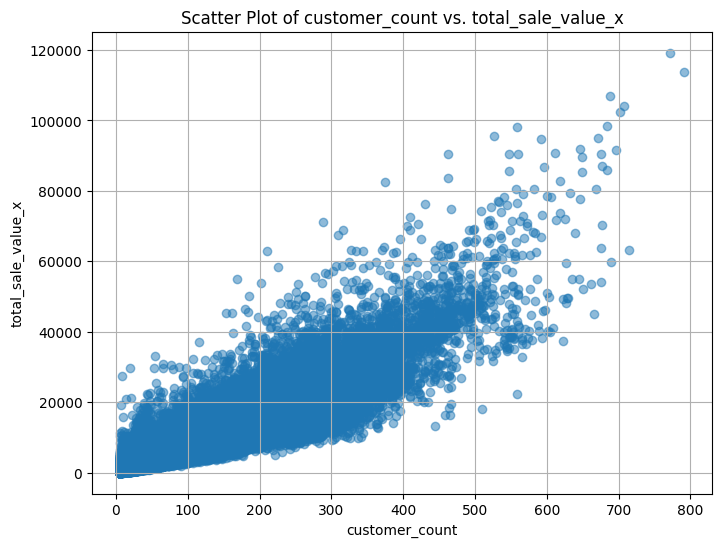

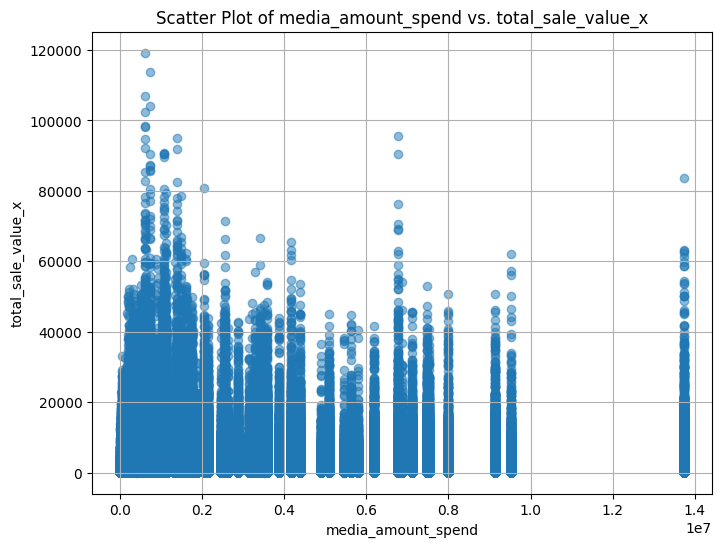

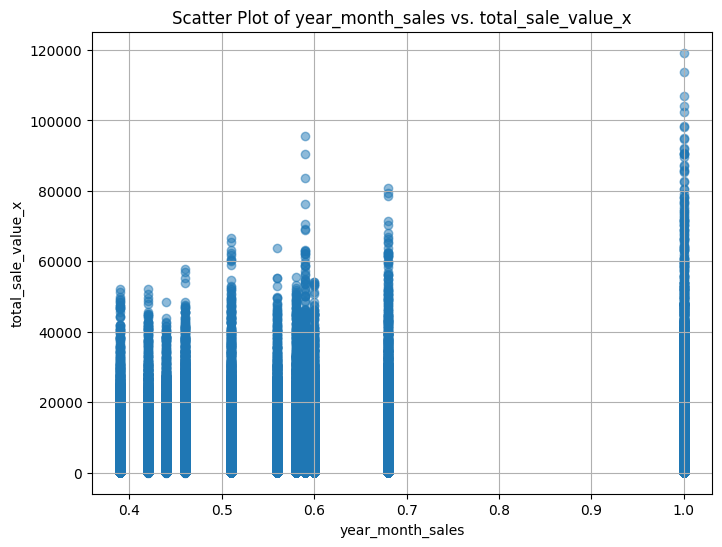

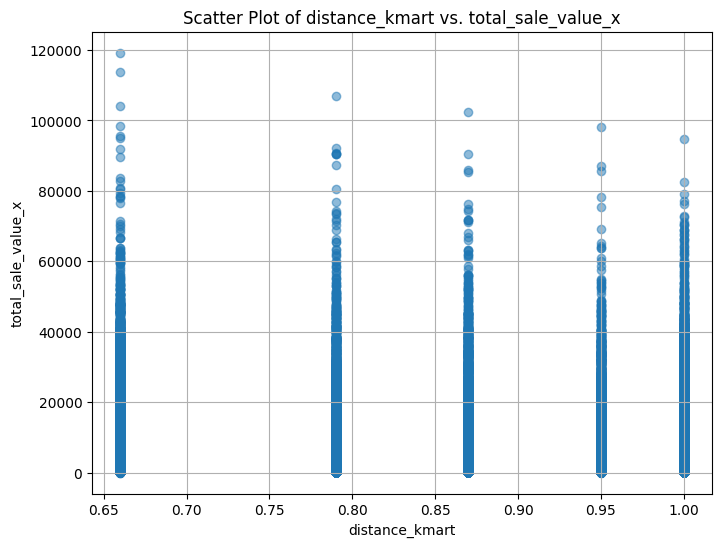

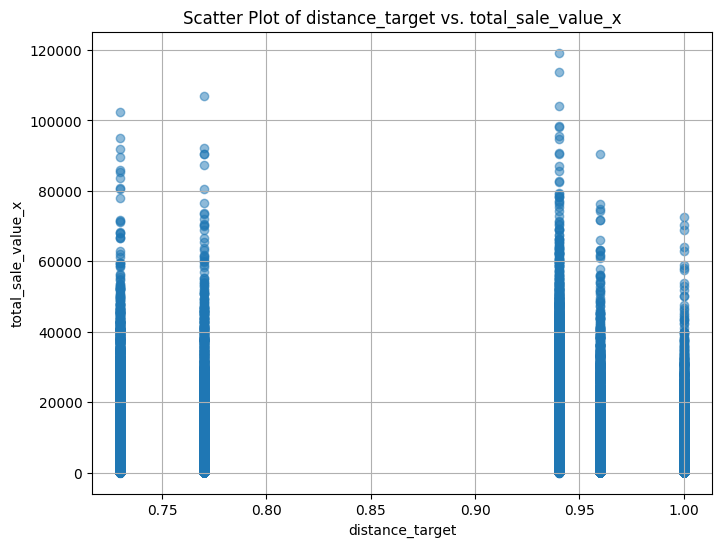

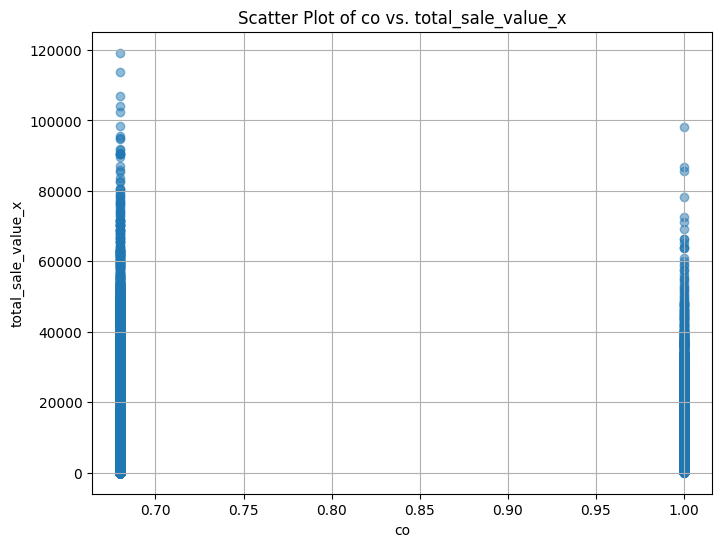

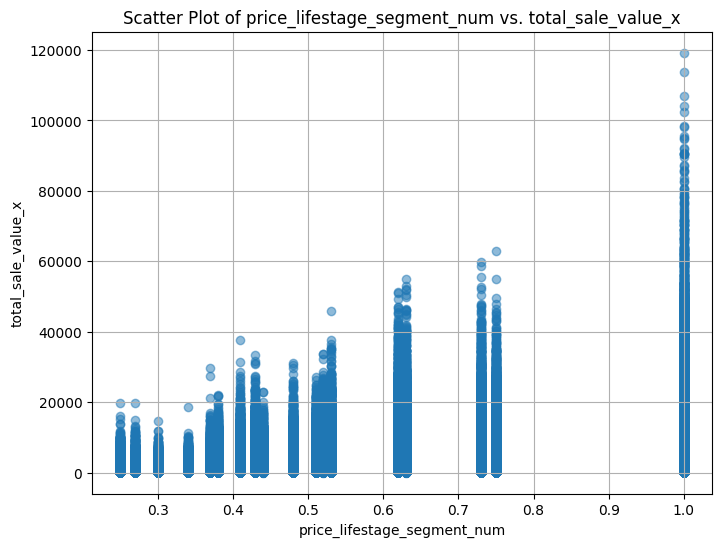

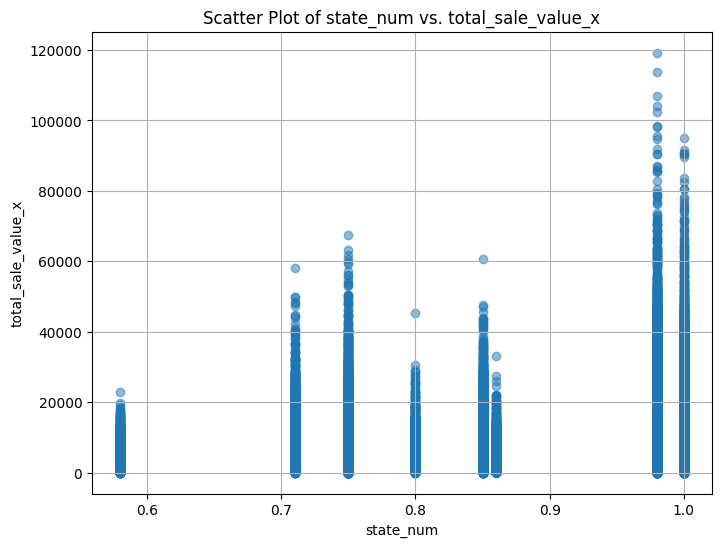

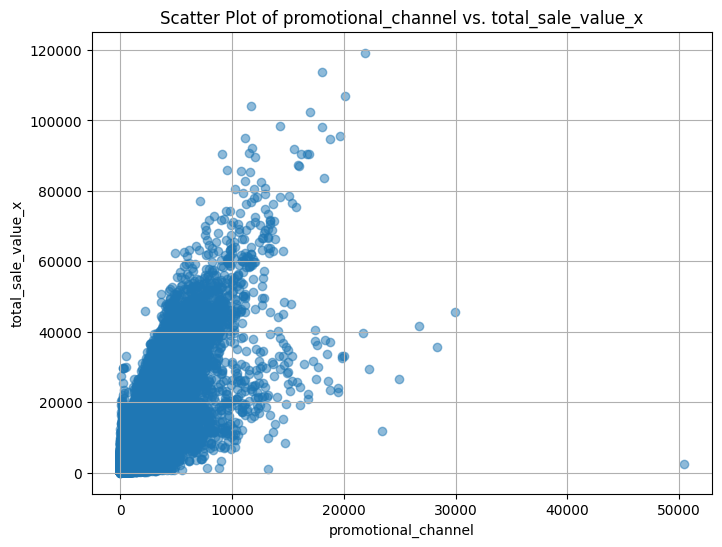

In [151]:
response_variable = 'total_sale_value_x'


for feature in features:
    plt.figure(figsize=(8, 6)) 
    plt.scatter(sales_train1[feature], sales_train1[response_variable], alpha=0.5) 
    plt.title(f'Scatter Plot of {feature} vs. {response_variable}')
    plt.xlabel(feature)
    plt.ylabel(response_variable)
    plt.grid(True)
    
    plt.savefig(f'{feature}_vs_{response_variable}_scatter.png')
    plt.show() 


In [152]:
correlation_matrix = sales_train1.corr()

# Get the list of all variables (column names)
variables = correlation_matrix.columns

variables


/var/folders/sm/pvsh_08j0q9fp5m216cy4qhw0000gn/T/ipykernel_2143/1278839726.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_train1.corr()


Index(['customer_postcode', 'customer_count', 'transaction_count',
       'total_sale_value_x', 'total_sale_value_ex_gst_x',
       'total_promotional_sales_value_x', 'store_postcode', 'store_latitude',
       'store_longitude', 'co_location_flag', 'total_sale_value_y',
       'total_promotional_sales_value_y', 'total_sale_value_ex_gst_y',
       'media_amount_spend', 'year_month_sales', 'distance_kmart',
       'distance_target', 'distance_kmart_target', 'co',
       'price_lifestage_segment_num', 'main_segment_num', 'segment_num',
       'state_num', 'channel_num', 'promotional_channel',
       'price_lifestage_segment_channel_num', 'state_lifestage',
       'promotional_price_lifestage_segment', 'state_promotional'],
      dtype='object')

In [153]:
len(sales_train1['customer_count'].unique())

610

### Scaling Predictors 

In [208]:
features = ['customer_count',
       'media_amount_spend', 'year_month_sales', 'distance_kmart',
       'distance_target', 'co',
       'price_lifestage_segment_num',
       'state_num', 'promotional_channel'
        ]
# 'distance_kmart_target','main_segment_num', 'segment_num','state_lifestage','promotional_price_lifestage_segment',
#        'state_promotional'

# price_lifestage_segment_channel_num'
X_train = sales_train1[features]
X_test = sales_test1[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train = sales_train1['total_sale_value_x']
y_test = sales_test1['total_sale_value_x']




In [209]:
# predictor variables that can be used in OLS without causing multicollinearity
# promotional_total_sals_value/total_sale_value, customer/transaction count 
# !! It's better to obtain information about the relevant socialeconomic index if we want to include customer segment variable in our modles 



import statsmodels.api as sm


# X = sm.add_constant(scaled_X)

# Fit the OLS regression model
ols_model = sm.OLS(sales_train1['total_sale_value_x'], sm.add_constant(X_train_scaled) ).fit()

# Get a summary of the regression results
summary = ols_model.summary()

summary





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_sale_value_x   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 2.077e+06
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:42:33   Log-Likelihood:            -1.4783e+07
No. Observations:             1814020   AIC:                         2.957e+07
Df Residuals:                 1814010   BIC:                         2.957e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1684.8965      0.622   2710.038      0.000    1683.678    1686.115
x1          1810.8778      1.079   1678.859      0.000    1808.764    1812.992
x2            11.0430      0.657     16.802      0.000       9.755      12.331
x3           140.9523      0.626    225.278      0.000     139.726     142.179
x4            50.4463      0.697     72.350      0.000      49.080      51.813
x5            23.3736      0.700     33.382      0.000      22.001      24.746
x6            46.5626      0.643     72.428      0.000      45.303      47.823
x7           143.3537      0.638    224.744      0.000     142.104     144.604
x8            48.7393      0.654     74.505      0.000      47.457      50.021
x9           945.7835      1.094    864.166      0.000     943.638     947.929
==============================================================================
Omnibus:                  1518142.971   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4386294288.428
Skew:                           2.562   Prob(JB):                         0.00
Kurtosis:                     243.844   Cond. No.                         3.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
results = pd.DataFrame(columns=['RMSE'])
results_log = pd.DataFrame(columns=['RMSE'])

### OLS 

In [205]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train_scaled, y_train);

In [198]:
from sklearn.metrics import mean_squared_error

y_pred = ols.predict(X_train_scaled)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Calculate the RMSE by taking the square root of the MSE
rmse = np.sqrt(mse)

results.loc['OLS'] = rmse

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 837.3705641591871


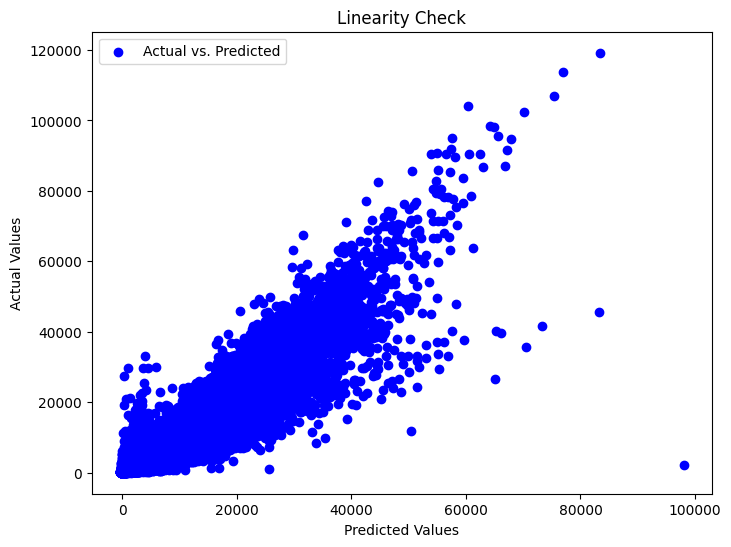

In [175]:

plt.figure(figsize=(8, 6)) 

plt.scatter(y_pred, sales_train1['total_sale_value_x'], c='blue', label='Actual vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check')
plt.legend()
plt.show()


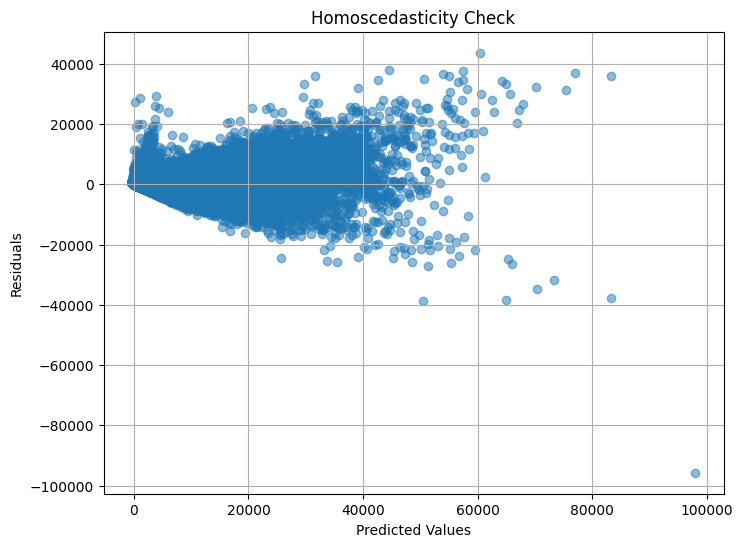

In [199]:
residuals = y_train - y_pred
    


plt.figure(figsize=(8, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.grid(True)
    
plt.savefig(f'{feature}_vs_residuals.png')
plt.show()


#  plt.scatter(X_train_scaled[:, features.index(feature)], residuals, alpha=0.5)


### OLS Log

In [176]:
sales_train1['log_total_sale_value_x'] = np.log(sales_train1['total_sale_value_x'] + 1)

sales_test1['log_total_sale_value_x'] = np.log(sales_test1['total_sale_value_x'] + 1)


In [177]:

ols_log = LinearRegression()
ols_log.fit(X_train_scaled, sales_train1['log_total_sale_value_x']);


# model_log = sm.OLS(sales_train1['log_total_sale_value_x'], X_train_scaled).fit()
# summary = model_log.summary()
# summary


In [178]:

y_pred = ols_log.predict(X_train_scaled)

mse = mean_squared_error(sales_train1['log_total_sale_value_x'], y_pred)

rmse = np.sqrt(mse)

results_log.loc['OLS_Log'] = rmse

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.6130823186619933


In [179]:
results_log

,RMSE
OLS_Log,0.613082


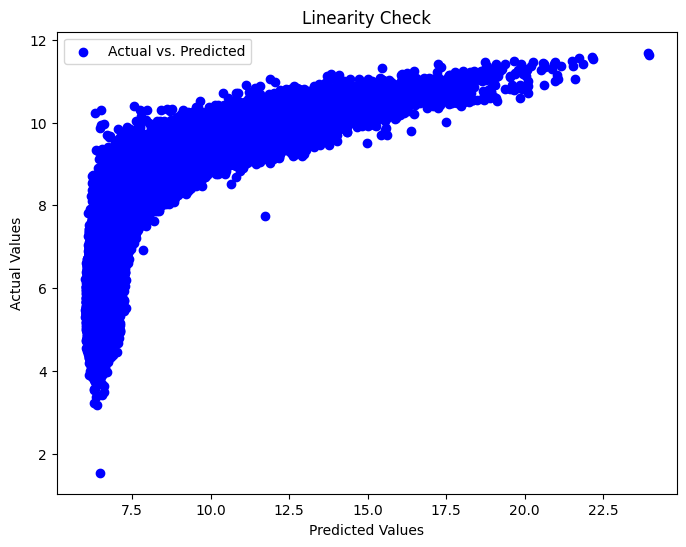

In [181]:

plt.figure(figsize=(8, 6)) 

plt.scatter(y_pred, sales_train1['log_total_sale_value_x'], c='blue', label='Actual vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check')
plt.legend()
plt.show()


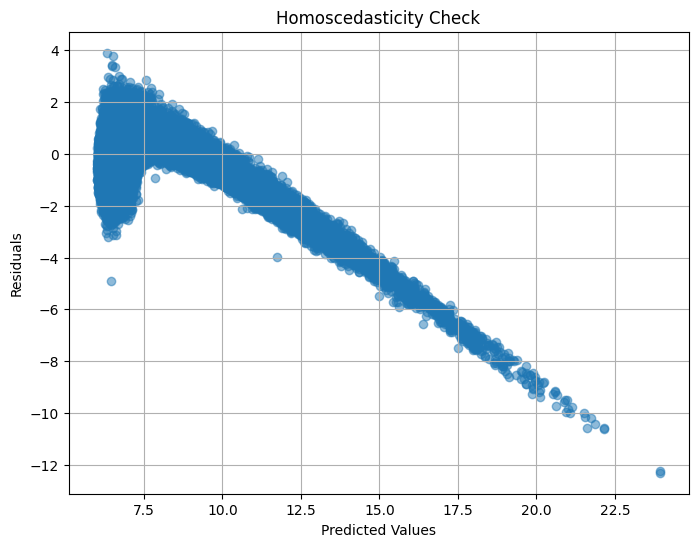

In [180]:
residuals = sales_train1['log_total_sale_value_x'] - y_pred
    


plt.figure(figsize=(8, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.grid(True)
    
plt.savefig(f'{feature}_vs_residuals.png')
plt.show()



### Lasso regression

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_predict



In [194]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)
best_lasso = Lasso(alpha=lasso.alpha_);



In [195]:
y_pred = cross_val_predict(best_lasso, X_train_scaled, y_train, cv=5)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

alpha = lasso.alpha_

results.loc['Lasso'] = rmse


In [185]:
results

,RMSE
OLS,837.370564
Lasso,837.645030


/Users/pan./PycharmProjects/James/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/pan./PycharmProjects/James/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/pan./PycharmProjects/James/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.065e+11, tolerance: 1.154e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the so

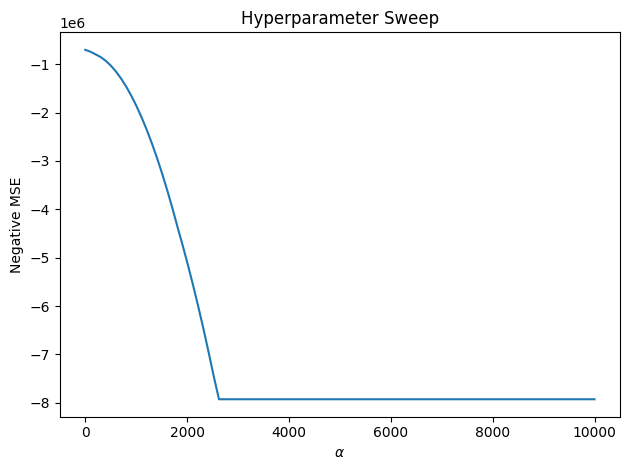

In [606]:

alphas = np.linspace(0, 10000, 100)

neg_mse = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    scores_mse = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    neg_mse.append(scores_mse.mean())
    
plt.figure()
plt.plot(alphas, neg_mse)
plt.title('Hyperparameter Sweep')
plt.xlabel(r'$\alpha$')
plt.ylabel('Negative MSE')
plt.tight_layout()

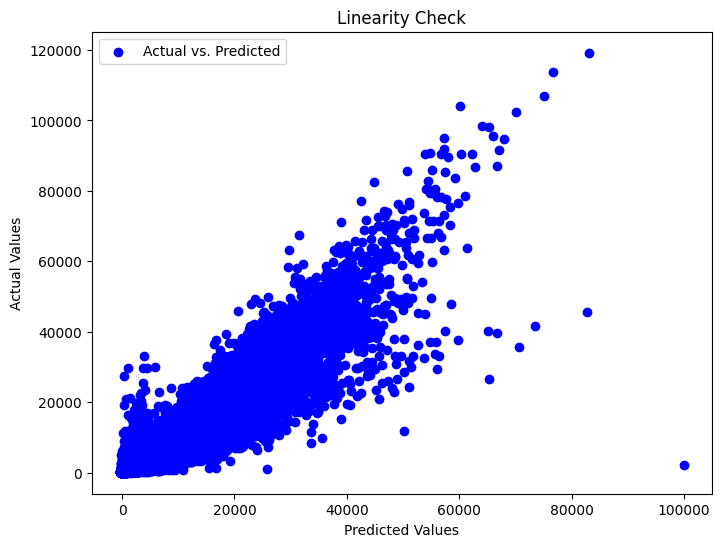

In [186]:

plt.figure(figsize=(8, 6)) 

plt.scatter(y_pred, y_train, c='blue', label='Actual vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check')
plt.legend()
plt.show()


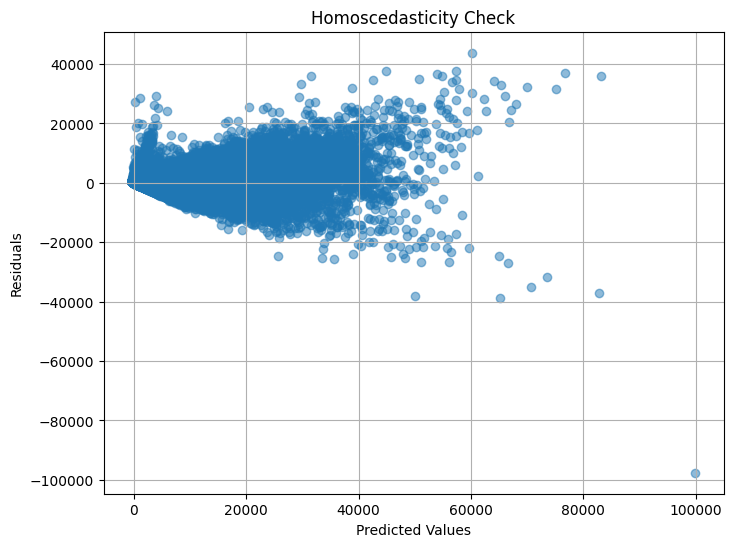

In [196]:
residuals = y_train - y_pred
    


plt.figure(figsize=(8, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.grid(True)
    
plt.savefig(f'{feature}_vs_residuals.png')
plt.show()

### Lasso regression (Log)

In [188]:
lasso_log = LassoCV(cv=5)
lasso_log.fit(X_train_scaled, sales_train1['log_total_sale_value_x'])
best_lasso = Lasso(alpha=lasso_log.alpha_);


In [189]:
y_pred = cross_val_predict(best_lasso, X_train_scaled, sales_train1['log_total_sale_value_x'], cv=5)

mse = mean_squared_error(sales_train1['log_total_sale_value_x'], y_pred)

rmse = np.sqrt(mse)

alpha = lasso_log.alpha_

results_log.loc['Lasso_Log'] = rmse

In [190]:
alpha

0.0007308304020263284

In [191]:
results_log

,RMSE
OLS_Log,0.613082
Lasso_Log,0.613093


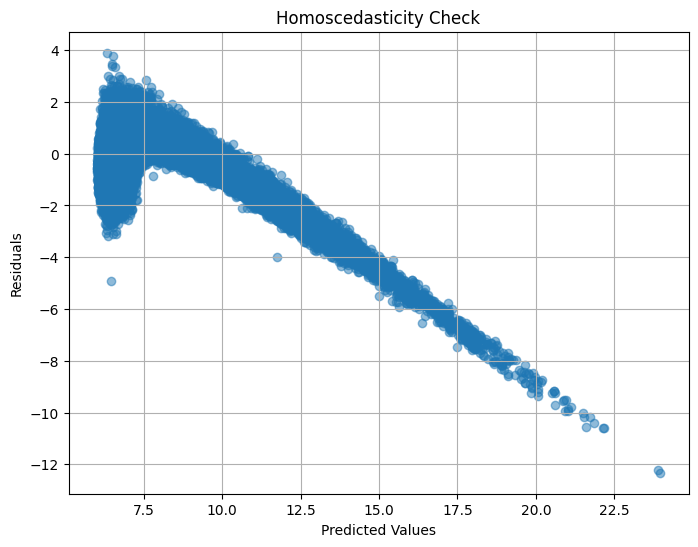

In [192]:
residuals = y_train - y_pred
    


plt.figure(figsize=(8, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.grid(True)
    
plt.savefig(f'{feature}_vs_residuals.png')
plt.show()

### Ridge 

In [201]:

from sklearn.linear_model import Ridge, RidgeCV
import numpy as np

alphas = np.logspace(-6, 6, 200)

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train)
best_ridge = Ridge(alpha=ridge.alpha_);


In [202]:
y_pred = cross_val_predict(best_ridge, X_train_scaled, y_train, cv=5)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

alpha = ridge.alpha_

results.loc['Ridge'] = rmse


In [561]:
alpha

91.15888299750819

In [562]:
results

,RMSE
OLS,837.370564
Lasso,837.645030
Ridge,837.621650


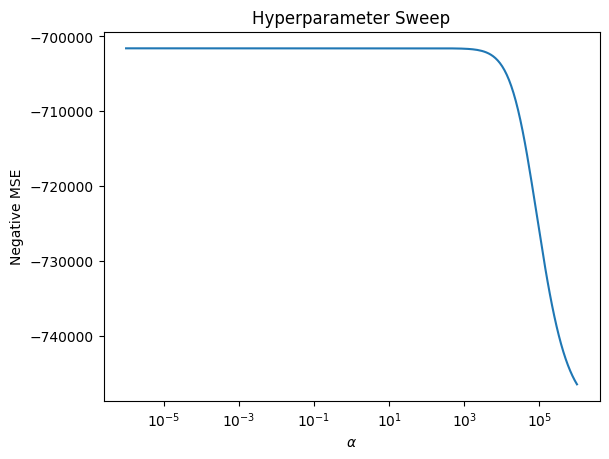

In [221]:
alphas = np.logspace(-6, 6, 200)

neg_mse = []

for alpha in alphas:
    l2 = Ridge(alpha=alpha)
    score_mse = cross_val_score(l2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    neg_mse.append(score_mse.mean())

plt.figure()
plt.plot(alphas, neg_mse)
plt.title('Hyperparameter Sweep')
plt.xlabel(r'$\alpha$')
plt.ylabel('Negative MSE')
plt.xscale('log')
plt.savefig('plot.png')

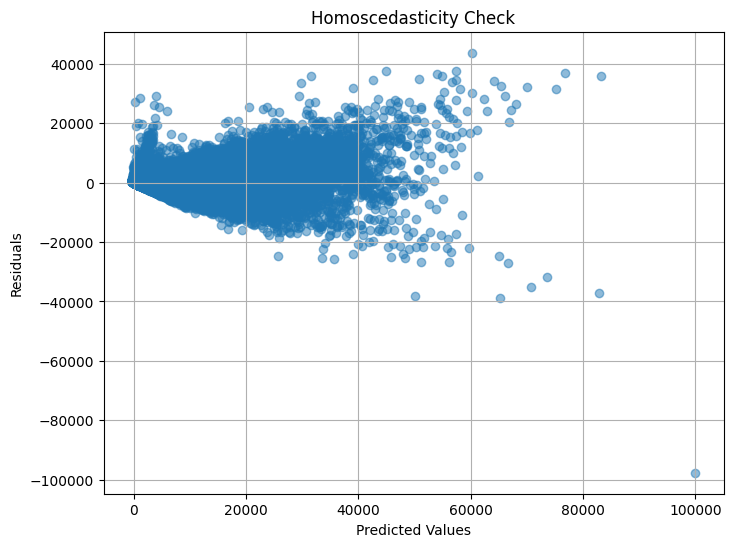

In [203]:
residuals = y_train - y_pred
    


plt.figure(figsize=(8, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.grid(True)
    
plt.savefig(f'{feature}_vs_residuals.png')
plt.show()

### Ridge regression (Log)

In [618]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-6, 6, 200)

ridge_log = RidgeCV(alphas=alphas, cv=5)
ridge_log.fit(X_train_scaled, sales_train1['log_total_sale_value_x'])
best_ridge = Ridge(alpha=ridge_log.alpha_);


In [556]:
y_pred = cross_val_predict(best_ridge, X_train_scaled, sales_train1['log_total_sale_value_x'], cv=5)

mse = mean_squared_error(sales_train1['log_total_sale_value_x'], y_pred)

rmse = np.sqrt(mse)

alpha = ridge_log.alpha_

results_log.loc['Ridge_Log'] = rmse

In [557]:
alpha

19.791668678535572

In [558]:
results_log

,RMSE
OLS_Log,0.613082
Lasso_Log,0.613093
Ridge_Log,0.613090


### Elastic Net (Log)

In [623]:

from sklearn.linear_model import ElasticNetCV, ElasticNet

elastic_net_log = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=5)
elastic_net_log.fit(X_train_scaled, sales_train1['log_total_sale_value_x'])
best_elastic_net = ElasticNet(l1_ratio=elastic_net_log.l1_ratio_, alpha=elastic_net_log.alpha_);

In [564]:
y_pred = cross_val_predict(best_elastic_net, X_train_scaled, sales_train1['log_total_sale_value_x'], cv=5)

mse = mean_squared_error(sales_train1['log_total_sale_value_x'], y_pred)

rmse = np.sqrt(mse)

ratio = elastic_net_log.l1_ratio_

results_log.loc['Elastic_Net_Log'] = rmse

In [565]:
ratio

0.99

In [566]:
results_log

,RMSE
OLS_Log,0.613082
Lasso_Log,0.613093
Ridge_Log,0.613090
Elastic_Net_Log,0.613093


### Elastic_Net 

In [567]:

elastic_net = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=5)
elastic_net.fit(X_train_scaled, y_train)
best_elastic_net = ElasticNet(l1_ratio=elastic_net.l1_ratio_, alpha=elastic_net.alpha_);

In [568]:
y_pred = cross_val_predict(best_elastic_net, X_train_scaled, y_train, cv=5)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

ratio = elastic_net.l1_ratio_

results.loc['Elastic_Net'] = rmse

In [569]:
results

,RMSE
OLS,837.370564
Lasso,837.645030
Ridge,837.621650
Elastic_Net,839.252351


In [570]:
results_log

,RMSE
OLS_Log,0.613082
Lasso_Log,0.613093
Ridge_Log,0.613090
Elastic_Net_Log,0.613093


### Model Evaluation 

In [219]:
# OLS

y_pred = ols.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [591]:
rmse


821.7696847649601

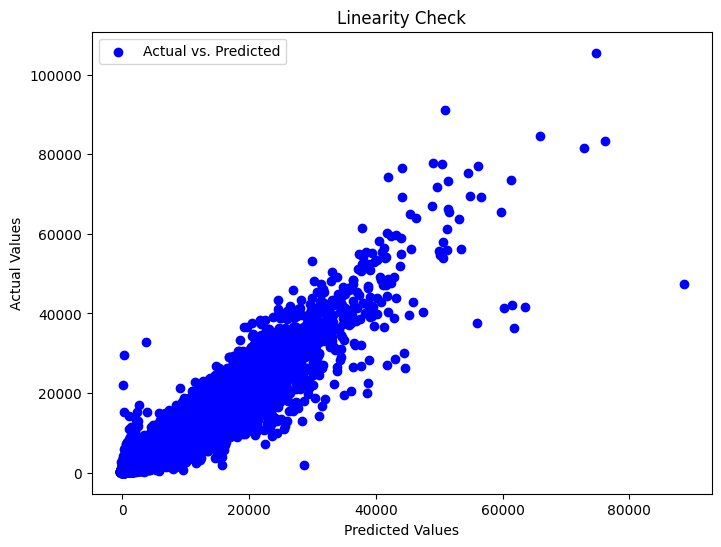

In [218]:

plt.figure(figsize=(8, 6)) 

plt.scatter(y_pred, y_test, c='blue', label='Actual vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check')
plt.legend()
plt.show()

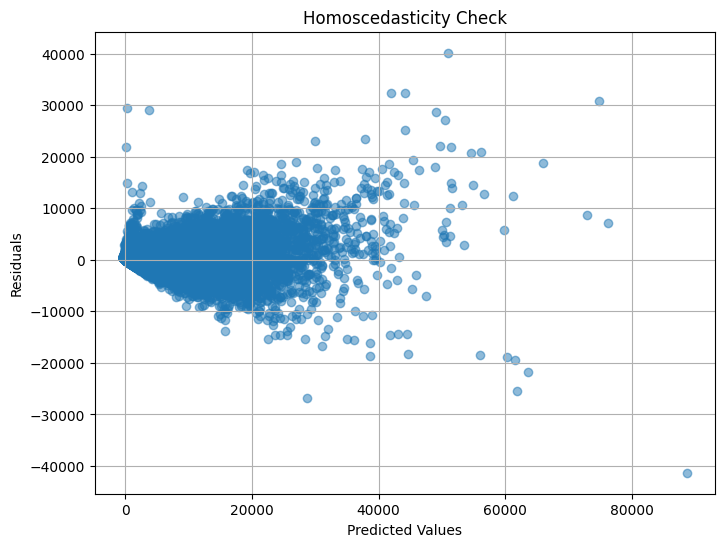

In [220]:
residuals = y_test - y_pred
    


plt.figure(figsize=(8, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.grid(True)
    
plt.savefig(f'{feature}_vs_residuals.png')
plt.show()

In [213]:
# Ridge

y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [603]:
# choose Ridge regression as our final model, it has the smallest rmse on testset
rmse

821.7693642891892

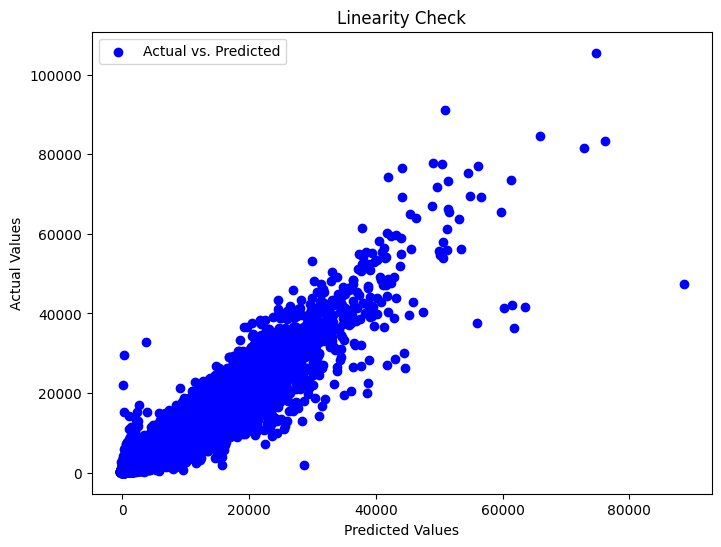

In [216]:

plt.figure(figsize=(8, 6)) 

plt.scatter(y_pred, y_test, c='blue', label='Actual vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check')
plt.legend()
plt.show()


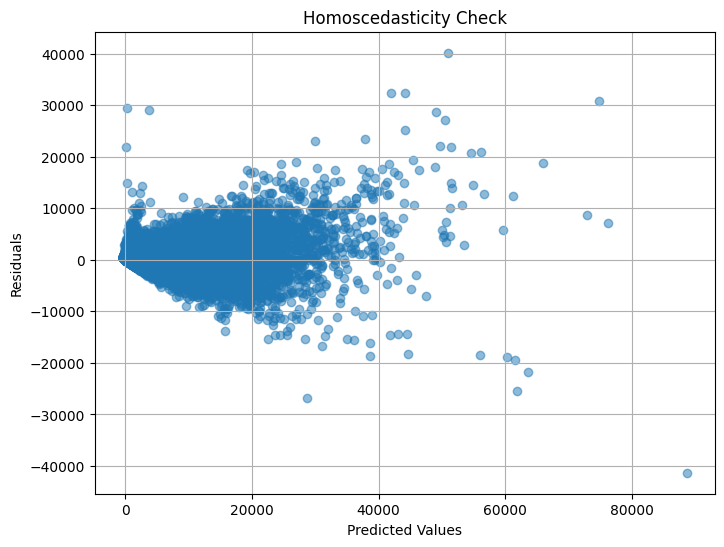

In [215]:
residuals = y_test - y_pred
    


plt.figure(figsize=(8, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.grid(True)
    
plt.savefig(f'{feature}_vs_residuals.png')
plt.show()

In [598]:
# Lasso 

y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [599]:
rmse

3271.1155581913395

In [600]:
# Elastic Net

y_pred = elastic_net.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [601]:
rmse

823.2141939630751

In [ ]:
# The end of the analysis 

In [619]:

y_pred = ols_log.predict(X_test_scaled)

mse = mean_squared_error(sales_test1['log_total_sale_value_x'], y_pred)
rmse = np.sqrt(mse)

rmse

0.6134681681699358

In [620]:
y_pred = lasso_log.predict(X_test_scaled)

mse = mean_squared_error(sales_test1['log_total_sale_value_x'], y_pred)
rmse = np.sqrt(mse)

rmse

0.6134651528364693

In [621]:
y_pred = ridge_log.predict(X_test_scaled)

mse = mean_squared_error(sales_test1['log_total_sale_value_x'], y_pred)
rmse = np.sqrt(mse)

rmse

0.6134681657147156

In [624]:
y_pred = elastic_net_log.predict(X_test_scaled)

mse = mean_squared_error(sales_test1['log_total_sale_value_x'], y_pred)
rmse = np.sqrt(mse)

rmse

0.6134651563802884

In [571]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error as mse



# alphas = np.linspace(0, 50000, 100)

# neg_mse = []
# for alpha in alphas:
#     model = Lasso(alpha = alpha)
#     scores_mse = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
#     neg_mse.append(scores_mse.mean())
    
# plt.figure()
# plt.plot(alphas, neg_mse)
# plt.title('Hyperparameter Sweep')
# plt.xlabel(r'$\alpha$')
# plt.ylabel('Negative MSE')
# plt.tight_layout()
# plt.savefig('plot.png', dpi = 200)

# best_alpha = alphas[np.argmax(neg_mse)]

# final_model = Lasso(alpha = best_alpha)
# final_model.fit(X_train_scaled, y_train)

# y_pred = final_model.predict(X_test_scaled)

# print('Alpha: {:.2f}'.format(best_alpha))
# print('RMSE: {:.2f}'.format(mse(y_train, y_pred, squared = False)))

In [572]:
# 获取特征的系数
coefficients = final_model.coef_

# 将系数与其相应的特征名配对并打印结果
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef:.2f}')


customer_count: 118.62
media_amount_spend: -946.02
year_month_sales: 3162.18
distance_kmart: -856.03
distance_target: -118.25
co: 28.00
price_lifestage_segment_num: 0.41
state_num: 17.69
promotional_channel: 126.24


In [573]:
# #year_month_sales: 130.77

# 每增加一个单位的 year_month_sales，销售额的预期将增加 130.77 个单位。
# price_lifestage_segment_channel_num: 46.55

# 每增加一个单位的 price_lifestage_segment_channel_num，销售额的预期将增加 46.55 个单位。
# promotional_price_lifestage_segment: 681.92

# 此系数的正值表明，与预期不符，promotional_price_lifestage_segment 的增加与销售额的增加正相关。每增加一个单位的 promotional_price_lifestage_segment，销售额的预期将增加 681.92 个单位。
# transaction_count: 2126.37

# transaction_count 似乎是最重要的特征，每增加一个单位的 transaction_count，销售额的预期将增加 2126.37 个单位。
# state_num: 53.47

# state_num 每增加一个单位，销售额的预期将增加 53.47 个单位。
# distance_kmart: 35.03

# distance_kmart 每增加一个单位，销售额的预期将增加 35.03 个单位。
# distance_target: 17.44

# distance_target 每增加一个单位，销售额的预期将增加 17.44 个单位。
# co: 41.39

# co 每增加一个单位，销售额的预期将增加 41.39 个单位。
# 这些系数提供了对每个特征如何影响目标变量（销售额）的洞见。如前所述，请确保在制定策略或做出决策时验证这些发现，并考虑所有可能的业务背景和外部因素。希望这些解释有助于您理解模型的输出！

### Lasso (Log)

In [574]:
# 获取特征的系数
coefficients = final_model.coef_

# 将系数与其相应的特征名配对并打印结果
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef:.2f}')


customer_count: 118.62
media_amount_spend: -946.02
year_month_sales: 3162.18
distance_kmart: -856.03
distance_target: -118.25
co: 28.00
price_lifestage_segment_num: 0.41
state_num: 17.69
promotional_channel: 126.24


In [575]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error as mse

# features = ['year_month_sales','price_lifestage_segment_channel_num','promotional_price_lifestage_segment','transaction_count', 'state_num','distance_kmart', 'distance_target', 'co']

# X_train = sales_train1[features].to_numpy()
# y_train = sales_train1['log_total_sale_value_x'].to_numpy()

# X_test = sales_test1[features].to_numpy()
# y_test = sales_test1['log_total_sale_value_x'].to_numpy()

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# alphas = np.linspace(0, 50000, 100)

# neg_mse = []
# for alpha in alphas:
#     model = Lasso(alpha = alpha)
#     scores_mse = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
#     neg_mse.append(scores_mse.mean())
    
# plt.figure()
# plt.plot(alphas, neg_mse)
# plt.title('Hyperparameter Sweep')
# plt.xlabel(r'$\alpha$')
# plt.ylabel('Negative MSE')
# plt.tight_layout()
# plt.savefig('plot.png', dpi = 200)

# best_alpha = alphas[np.argmax(neg_mse)]

# final_model = Lasso(alpha = best_alpha)
# final_model.fit(X_train, y_train)

# y_pred = final_model.predict(X_test)

# print('Alpha: {:.2f}'.format(best_alpha))
# print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))

In [576]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error as mse
# from sklearn.metrics import r2_score

# features = ['customer_postcode', 'customer_count', 'transaction_count',
#        'total_promotional_sales_value_x', 'store_postcode', 'store_latitude',
#        'store_longitude',
#        'media_amount_spend', 'year_month_sales', 'distance_kmart',
#        'distance_target', 'distance_kmart_target', 'co',
#        'price_lifestage_segment_num', 'main_segment_num', 'segment_num',
#        'state_num', 'channel_num', 'price_lifestage_segment_channel_num',
#        'state_lifestage', 'promotional_price_lifestage_segment',
#        'state_promotional']


# X_train = sales_train1[features].to_numpy()
# y_train = sales_train1['total_sale_value_x'].to_numpy()

# X_test = sales_test1[features].to_numpy()
# y_test = sales_test1['total_sale_value_x'].to_numpy()

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# neg_mse = []
# alphas = np.logspace(-6, 6, 100)
# for alpha in alphas:
#     model = Ridge(alpha = alpha)
#     scores_mse = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
#     neg_mse.append(scores_mse.mean())

# plt.figure()
# plt.plot(alphas, neg_mse)
# plt.title('Hyperparameter Sweep')
# plt.xlabel(r'$\alpha$')
# plt.ylabel('Negative MSE')
# plt.xscale('log')
# plt.savefig('plot.png')

# best_alpha = alphas[np.argmax(neg_mse)]

# final_model = Ridge(alpha = best_alpha)
# final_model.fit(X_train, y_train)

# y_pred = final_model.predict(X_test)

# print('Alpha: {:.2f}'.format(best_alpha))
# print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))


In [577]:
# # 获取特征的系数
# coefficients = final_model.coef_

# # 将系数与其相应的特征名配对并打印结果
# for feature, coef in zip(features, coefficients):
#     print(f'{feature}: {coef:.2f}')


### Ridge (log)

In [578]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error as mse
# from sklearn.metrics import r2_score

# features = ['year_month_sales','price_lifestage_segment_channel_num','promotional_price_lifestage_segment','transaction_count', 'state_num','distance_kmart', 'distance_target', 'co']

# X_train = sales_train1[features].to_numpy()
# y_train = sales_train1['log_total_sale_value_x'].to_numpy()

# X_test = sales_test1[features].to_numpy()
# y_test = sales_test1['log_total_sale_value_x'].to_numpy()

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# neg_mse = []
# alphas = np.logspace(-6, 6, 100)
# for alpha in alphas:
#     model = Ridge(alpha = alpha)
#     scores_mse = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
#     neg_mse.append(scores_mse.mean())

# plt.figure()
# plt.plot(alphas, neg_mse)
# plt.title('Hyperparameter Sweep')
# plt.xlabel(r'$\alpha$')
# plt.ylabel('Negative MSE')
# plt.xscale('log')
# plt.savefig('plot.png')

# best_alpha = alphas[np.argmax(neg_mse)]

# final_model = Ridge(alpha = best_alpha)
# final_model.fit(X_train, y_train)

# y_pred = final_model.predict(X_test)

# print('Alpha: {:.2f}'.format(best_alpha))
# print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))


In [579]:
# # 获取特征的系数
# coefficients = final_model.coef_

# # 将系数与其相应的特征名配对并打印结果
# for feature, coef in zip(features, coefficients):
#     print(f'{feature}: {coef:.2f}')


In [580]:
# year_month_sales: 0.07

# 这表示year_month_sales与log_total_sale_value_x正相关。当year_month_sales增加1单位时，预计log_total_sale_value_x将增加0.07。等价于说，当year_month_sales增加1单位时，total_sale_value_x将增加大约7%。
# price_lifestage_segment_channel_num: 0.14

# 这个变量也是正相关的，并且影响比year_month_sales要大一些。具体来说，price_lifestage_segment_channel_num增加1单位时，total_sale_value_x预计将增加15%。
# promotional_price_lifestage_segment: -0.14

# 此变量与log_total_sale_value_x负相关。当promotional_price_lifestage_segment增加1单位时，total_sale_value_x预计将减少约13%。
# transaction_count: 0.80

# 这个变量的系数最大，表示它对模型的影响相当显著。当transaction_count增加1单位时，total_sale_value_x预计将增加大约122%。
# state_num: 0.05

# state_num的影响较小但仍然正相关。state_num增加1单位时，total_sale_value_x预计将增加大约5%。
# distance_kmart: 0.06

# 类似地，distance_kmart与log_total_sale_value_x正相关。其增加1单位时，total_sale_value_x预计将增加约6%。
# distance_target: 0.01

# 这个变量的系数最小，暗示它对模型的影响最小。distance_target增加1单位时，total_sale_value_x仅预计将增加约1%。
# co: 0.03

# co的影响也相对较小，增加1单位时，total_sale_value_x预计将增加约3%。
# 总之，transaction_count对模型的影响最大，其次是promotional_price_lifestage_segment（尽管它有一个负的系数）。distance_target和co的影响相对较小。

In [581]:
pd.set_option('display.max_columns', None)

sales_train1.head(
)

# pd.reset_option('display.max_columns')


,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value_x,total_sale_value_ex_gst_x,total_promotional_sales_value_x,financial_week_end_date,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,distance_to_kmart,distance_to_target,total_sale_value_y,total_promotional_sales_value_y,total_sale_value_ex_gst_y,year_month,media_amount_spend,year_month_sales,segment,main_segment,distance_kmart,distance_target,distance_kmart_target,co,price_lifestage_segment_num,main_segment_num,segment_num,state_num,channel_num,promotional_channel,price_lifestage_segment_channel_num,state_lifestage,promotional_price_lifestage_segment,state_promotional,log_total_sale_value_x
0,536fcc1021bff60edb212ca9b2480757,Store,NSW,2550.0,Budget-New Families,51,77,6691.29,6146.98,1545.78,2023-03-26,NSW,2550,-36.6785,149.8398,True,>5 KM,>5 KM,38132622.27,5879501.90,34759019.81,2023-03-01,6180823.875,0.46,New Families,Budget,1.00,0.94,0.9400,0.68,0.75,1.00,0.72,1.00,1.0,1545.78,0.75,0.7500,1159.3350,1545.7800,8.808711
1,151e50feaf21b61cf23e0b944abebe28,Store,VIC,3222.0,Budget-Retirees,8,8,364.53,331.40,89.72,2022-01-02,VIC,3220,-38.1467,144.3587,True,1-3 KM,Same Centre,57694483.90,7166089.98,52597105.02,2022-01-01,3209616.050,0.56,Retirees,Budget,0.87,0.73,0.6351,0.68,0.43,1.00,0.57,0.75,1.0,89.72,0.43,0.3225,38.5796,67.2900,5.901348
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,Store,QLD,4101.0,Mainstream-Young Singles/Couples,10,11,446.25,405.69,9.75,2023-03-19,QLD,4122,-27.5600,153.0811,True,Same Centre,Same Centre,92482637.90,9571752.04,84342899.73,2023-03-01,2876333.925,0.46,Young Singles/Couples,Mainstream,0.66,0.73,0.4818,0.68,0.41,0.81,0.52,0.98,1.0,9.75,0.41,0.4018,3.9975,9.5550,6.103118
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,Store,SA,5253.0,Mainstream-Young Families,79,119,7479.89,6817.90,1365.50,2023-01-29,SA,5253,-35.1183,139.2747,True,>5 KM,>5 KM,42636413.34,6131102.71,38922466.04,2023-01-01,356125.960,0.56,Young Families,Mainstream,1.00,0.94,0.9400,0.68,0.73,0.81,1.00,0.71,1.0,1365.50,0.73,0.5183,996.8150,969.5050,8.920107
4,97012ce84c33e28732cb5f12bb92363c,Store,VIC,3064.0,Premium-New Families,58,84,6172.44,5630.27,508.59,2021-11-07,VIC,3064,-37.5939,144.9103,True,Same Centre,>5 KM,54545504.41,7088165.04,49733005.77,2021-11-01,1335517.270,0.68,New Families,Premium,0.66,0.94,0.6204,0.68,0.34,0.56,0.72,0.75,1.0,508.59,0.34,0.2550,172.9206,381.4425,8.728011


### Model Evaluation 

### Group by each categorical variable and use proportion of mean total sales value to turn categorical variables to numerical 


In [582]:

sales_train1.groupby(['main_segment'])['total_sale_value_x'].mean()

main_segment
Budget        2062.263988
Mainstream    1668.855332
Premium       1149.223072
Name: total_sale_value_x, dtype: float64

In [583]:
sales_train1.groupby(['customer_state'])['total_sale_value_x'].mean()

customer_state
ACT    1106.425216
NSW    1905.273026
NT     1641.390572
QLD    1835.511444
SA     1351.142865
TAS    1484.289173
VIC    1421.938253
WA     1623.004088
Name: total_sale_value_x, dtype: float64

In [584]:
sales_train1.groupby(['price_lifestage_segment'])['total_sale_value_x'].mean() / 3036.72

price_lifestage_segment
Budget-Midage Singles/Couples        0.439158
Budget-New Families                  0.747243
Budget-Older Families                0.617496
Budget-Older Singles/Couples         0.622212
Budget-Retirees                      0.432978
Budget-Young Families                1.000000
Budget-Young Singles/Couples         0.517195
Mainstream-Midage Singles/Couples    0.370202
Mainstream-New Families              0.512663
Mainstream-Older Families            0.479408
Mainstream-Older Singles/Couples     0.630931
Mainstream-Retirees                  0.530621
Mainstream-Young Families            0.731999
Mainstream-Young Singles/Couples     0.410341
Premium-Midage Singles/Couples       0.269670
Premium-New Families                 0.341299
Premium-Older Families               0.303588
Premium-Older Singles/Couples        0.433644
Premium-Retirees                     0.382659
Premium-Young Families               0.505396
Premium-Young Singles/Couples        0.250778
Name: tota

In [585]:
sales_train1.groupby(['distance_to_target'])['total_sale_value_x'].mean() 

distance_to_target
1-3 KM         1884.439808
3-5 KM         1506.608861
<1 KM          1957.985187
>5 KM          1847.794114
Same Centre    1432.693221
Name: total_sale_value_x, dtype: float64

In [586]:
sales_train1.groupby(['co_location_flag'])['total_sale_value_x'].mean() /4043.492276

co_location_flag
False    0.59381
True     0.40619
Name: total_sale_value_x, dtype: float64

In [587]:
1884.439808+1506.608861+1957.985187+1847.794114+1432.693221

8629.521191

In [588]:
sales_train1.groupby(['price_lifestage_segment'])['total_promotional_sales_value_x'].mean()

price_lifestage_segment
Budget-Midage Singles/Couples        237.182902
Budget-New Families                  378.299630
Budget-Older Families                348.501292
Budget-Older Singles/Couples         369.060261
Budget-Retirees                      238.036095
Budget-Young Families                514.169683
Budget-Young Singles/Couples         296.353009
Mainstream-Midage Singles/Couples    156.835405
Mainstream-New Families              203.074366
Mainstream-Older Families            202.405025
Mainstream-Older Singles/Couples     273.881555
Mainstream-Retirees                  216.308903
Mainstream-Young Families            283.849949
Mainstream-Young Singles/Couples     175.207371
Premium-Midage Singles/Couples       109.565409
Premium-New Families                 125.694982
Premium-Older Families               119.749583
Premium-Older Singles/Couples        177.190857
Premium-Retirees                     145.986552
Premium-Young Families               183.253268
Premium-Young Si

In [589]:
sales_train1.groupby(['sales_channel'])['total_sale_value_x'].mean() /1694.856398

sales_channel
Digital - ClickCollect    0.738631
Digital - Delivery        0.420635
Store                     1.000000
Name: total_sale_value_x, dtype: float64